## FE 511 - Final Project

#### importing required packages

In [18]:
import pandas as pd
import warnings
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm  
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

#### Dismissing any warnings which may arise in the code

In [19]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


#### Importing Excel file of data gathered from bloomberg terminal, here we have last 10 year of S&P Index and Apple Stock price

In [20]:
df = pd.read_excel('bloomberg.xlsx', index_col=0)

In [21]:
df.head()

,Apple,S&P 500
2011-05-13,12.161,1337.77
2011-05-16,11.904,1329.47
2011-05-17,12.005,1328.98
2011-05-18,12.138,1340.68
2011-05-19,12.162,1343.60


#### We now added seperate columns to calculate the returns of S&P and Apple

In [22]:
df.insert(loc=1, column='S&P 500 Returns', value=['' for i in range(df.shape[0])])
df.insert(loc=3, column='Apple Returns', value=['' for i in range(df.shape[0])])
df.head()

,Apple,S&P 500 Returns,S&P 500,Apple Returns
2011-05-13,12.161,,1337.77,
2011-05-16,11.904,,1329.47,
2011-05-17,12.005,,1328.98,
2011-05-18,12.138,,1340.68,
2011-05-19,12.162,,1343.60,


In [23]:
df['S&P 500 Returns'][0] = 0
df['Apple Returns'][0] = 0

for i in range(len(df)-1): 
    df['S&P 500 Returns'][i+1] = (df['S&P 500'][i+1] - df['S&P 500'][i])/df['S&P 500'][i]
    df['Apple Returns'][i+1] = (df['Apple'][i+1] - df['Apple'][i])/df['Apple'][i]

In [24]:
df.head()

,Apple,S&P 500 Returns,S&P 500,Apple Returns
2011-05-13,12.161,0,1337.77,0
2011-05-16,11.904,-0.00620436,1329.47,-0.0211331
2011-05-17,12.005,-0.000368568,1328.98,0.00848454
2011-05-18,12.138,0.00880374,1340.68,0.0110787
2011-05-19,12.162,0.002178,1343.60,0.00197726


### EXPLORATORY DATA ANALYSIS

##### We only consider the return columns for our EDA

In [33]:
df_returns = df.iloc[1:,[1,3]]
df_prices = df.iloc[1:,[0,2]]
df_returns.head()

,S&P 500 Returns,Apple Returns
2011-05-16,-0.00620436,-0.0211331
2011-05-17,-0.000368568,0.00848454
2011-05-18,0.00880374,0.0110787
2011-05-19,0.002178,0.00197726
2011-05-20,-0.0076883,-0.0156224


#### Time Series Plot of S&P and Apple Price

Text(0.5, 1.0, 'Apple')

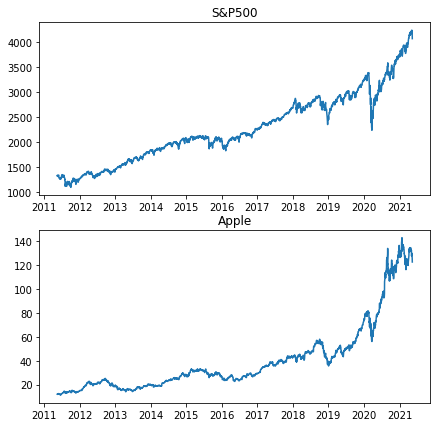

In [35]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize =(7,7))


axes[0].plot(df_prices['S&P 500'])
axes[0].set_title('S&P500')
axes[1].plot(df_prices['Apple'])
axes[1].set_title('Apple')


#### Time Series Plot of S&P and Apple Returns

Text(0.5, 1.0, 'Apple')

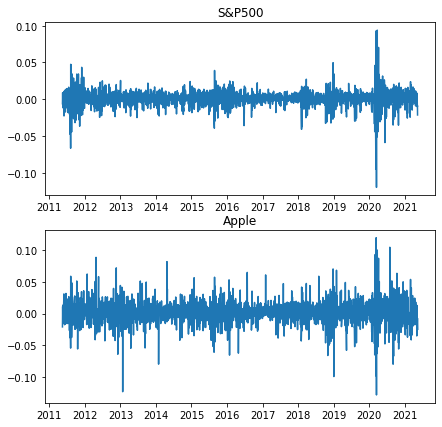

In [36]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize =(7,7))


axes[0].plot(df_returns['S&P 500 Returns'])
axes[0].set_title('S&P500')
axes[1].plot(df_returns['Apple Returns'])
axes[1].set_title('Apple')

#### Plotting Comparison of Returns Distribution with a Normal Distribution for S&P 500

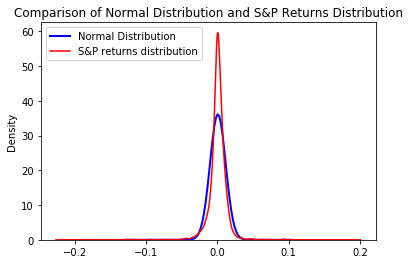

In [37]:
from scipy.stats import norm
import statistics
  
df_returns['S&P 500 Returns'] = df_returns['S&P 500 Returns'].astype(float)
df_returns['Apple Returns'] = df_returns['Apple Returns'].astype(float)
    
lst = []
x = (df_returns['S&P 500 Returns'].values)
for i in x: 
    lst.append(round(i,3))
lst = np.asarray(lst)

mu, std = norm.fit(lst)
# Plot the histogram.
plt.hist(lst, bins=25, density=True, alpha=0.6, color='white')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='blue', label = "Normal Distribution")
title = "Comparison of Normal Distribution and S&P Returns Distribution" 
plt.title(title)
df_returns['S&P 500 Returns'].plot.kde(color = 'red', label = 'S&P returns distribution')
plt.legend()
plt.show()

#### Plotting Comparison of Returns Distribution with a Normal Distribution for Apple

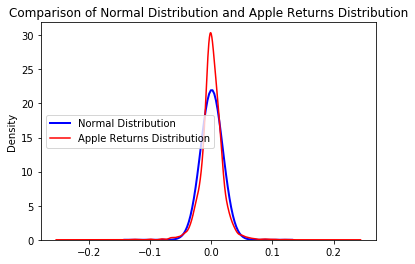

In [38]:
lst = []
x = (df_returns['Apple Returns'].values)
for i in x: 
    lst.append(round(i,3))
lst = np.asarray(lst)

mu, std = norm.fit(lst)
# Plot the histogram.
plt.hist(lst, bins=25, density=True, alpha=0.6, color='white')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='blue', label = "Normal Distribution")
title = "Comparison of Normal Distribution and Apple Returns Distribution"
plt.title(title)
df_returns['Apple Returns'].plot.kde(color = 'red', label = "Apple Returns Distribution")
plt.legend()
plt.show()

In [39]:
max(df_returns['S&P 500 Returns'])

0.09382765710199331

#### Performing regression where S&P 500 returns is the independent X variable and Apple returns is the dependent Y variable.

In [40]:
X = df_returns['S&P 500 Returns'].astype(float)
y = df_returns['Apple Returns'].astype(float)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Apple Returns   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1907.
Date:                Sat, 15 May 2021   Prob (F-statistic):          1.68e-310
Time:                        14:18:07   Log-Likelihood:                 7227.3
No. Observations:                2515   AIC:                        -1.445e+04
Df Residuals:                    2513   BIC:                        -1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0005      0.000     

#### Calculating Corelation

In [41]:
df_returns['S&P 500 Returns'] = df_returns['S&P 500 Returns'].astype(float)
df_returns['Apple Returns'] = df_returns['Apple Returns'].astype(float)
correlation = df_returns.corr()
print(correlation)

                 S&P 500 Returns  Apple Returns
S&P 500 Returns         1.000000       0.656869
Apple Returns           0.656869       1.000000
